In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from shutil import copyfile

In [5]:
import torchvision
torchvision.__version__

'0.8.1+cu101'

In [ ]:
!mkdir -p ../data
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz -P ../data
!tar xzf ../data/food-101.tar.gz -C ../data

--2020-12-26 01:58:15--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-12-26 01:58:16--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘../data/food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  29.2MB/s    in 2m 48s  

2020-12-26 02:01:04 (28.4 MB/s) - ‘../data/food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r  "/content/drive/MyDrive/food_energy_detection/meta" ./meta
!tar -xf "/content/drive/MyDrive/food_energy_detection/food-110.tar.gz" -C /content/

In [ ]:
%%capture
import os
from collections import defaultdict
import shutil, sys
import random
import math

In [ ]:
!rm -r train
!rm -r test
train_root_dir = "train"
test_root_dir = "test"
if not os.path.exists(train_root_dir):
    os.makedirs(train_root_dir)
if not os.path.exists(test_root_dir):
    os.makedirs(test_root_dir)

for item in os.listdir("images"):
    train_path = os.path.join(train_root_dir, item)
    test_path = os.path.join(test_root_dir, item)
    if not os.path.exists(train_path):
        os.makedirs(train_path)
    if not os.path.exists(test_path):
        os.makedirs(test_path)

print(len(os.listdir(train_root_dir)))

valid_pct = 0.2
for item in os.listdir("images"):
    src = os.path.join("images", item)
    train_dft = os.path.join(train_root_dir, item)
    test_dft = os.path.join(test_root_dir, item)
    files = os.listdir(src)
    random.shuffle(files)
    valid_size = math.floor(valid_pct*len(files))
    test_files = files[0:valid_size]
    train_files = files[valid_size:]
    
    for train_file in train_files:
        shutil.copyfile(os.path.join(src, train_file), os.path.join(train_dft, train_file))
    for test_file in test_files:
        shutil.copyfile(os.path.join(src, test_file), os.path.join(test_dft, test_file))

rm: cannot remove 'train': No such file or directory
rm: cannot remove 'test': No such file or directory
110


In [ ]:
bs = 64

In [ ]:
path = Path('.')
path_img = path/'images'
path_meta = path/'meta'

In [ ]:
path_train = path/'train'

In [ ]:
tfms = get_transforms(
                        do_flip=True,
                        flip_vert=True,
                        max_rotate=10.0,
                        max_zoom = 1.1,
                        max_lighting=0.25,
                        max_warp=0.25,
                        )

In [ ]:
data = (ImageList.from_folder(path_train).split_by_rand_pct(0.07, seed=42)
                                       .label_from_folder(classes=None)
                                       .transform(tfms=tfms, size=256)
                                       .databunch(bs=bs, num_workers=6))

In [ ]:
def get_ex():
    return open_image(path_train/'spring_rolls/85452.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(data.train_ds.tfms, **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(
                                                                        rows, cols, figsize=(width, height))[1].flatten())]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


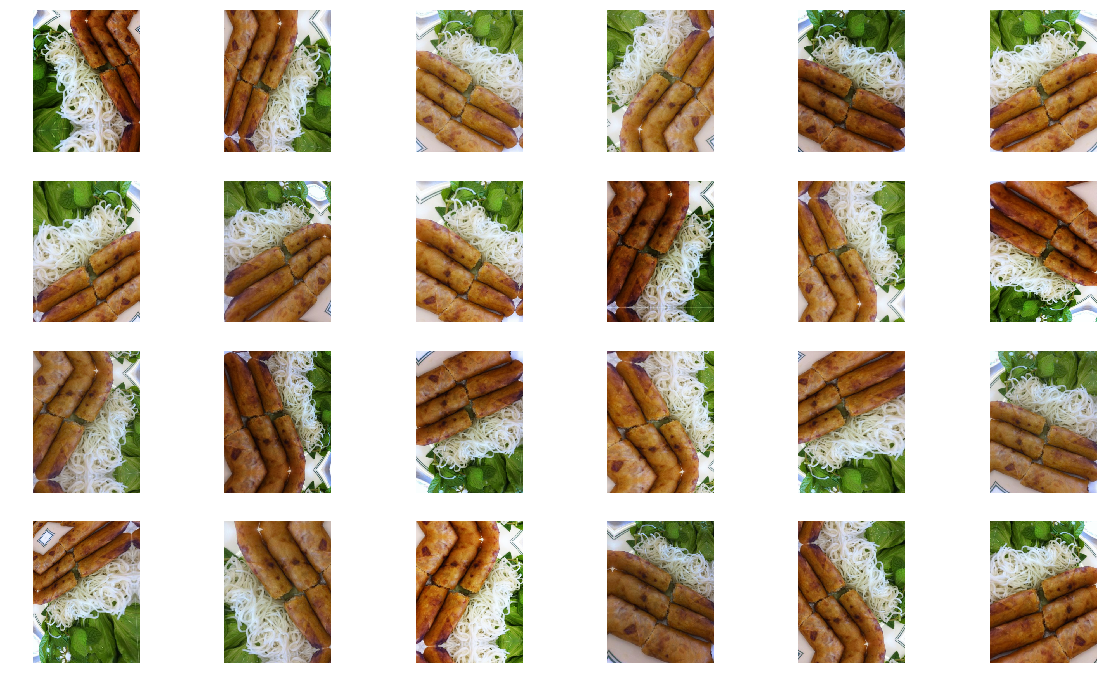

In [ ]:
plots_f(4, 6, 20, 12)

In [ ]:
def plots_f_indiv(idx, rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(data.train_ds.tfms[idx], **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(
                                                                        rows, cols, figsize=(width, height))[1].flatten())]

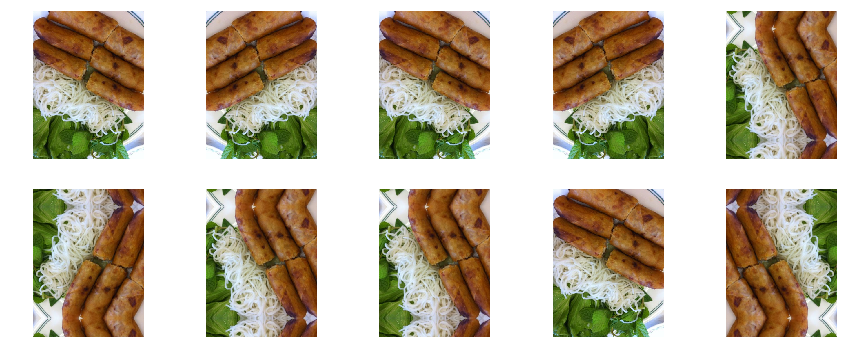

In [ ]:
plots_f_indiv(1, 2, 5, 15, 6)

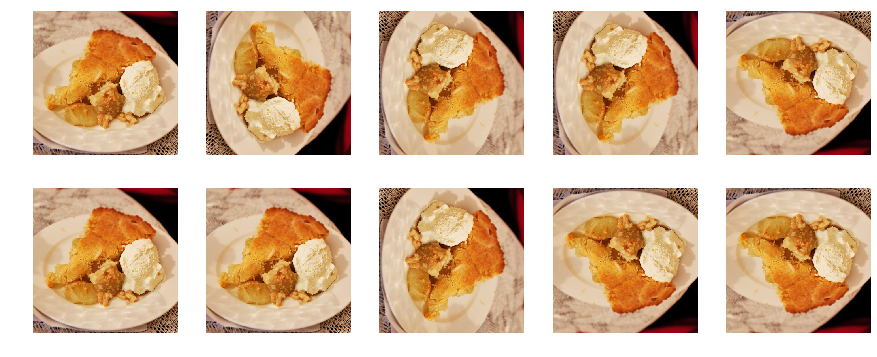

In [ ]:
[open_image(path_train/'apple_pie/727412.jpg').apply_tfms(data.train_ds.tfms[1]).show(ax=ax) for i, ax in 
    enumerate(plt.subplots(2,5, figsize=(15,6))[1].flatten())];

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


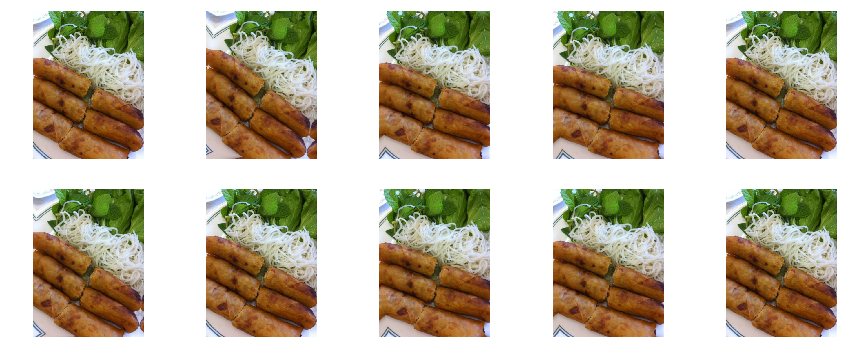

In [ ]:
plots_f_indiv(3, 2, 5, 15, 6)

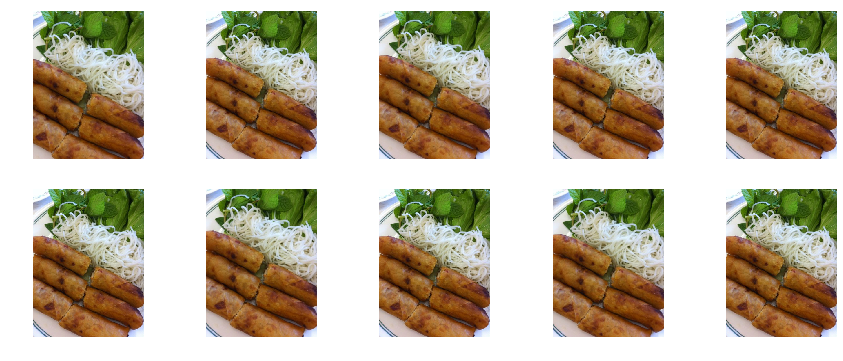

In [ ]:
plots_f_indiv(4, 2, 5, 15, 6)

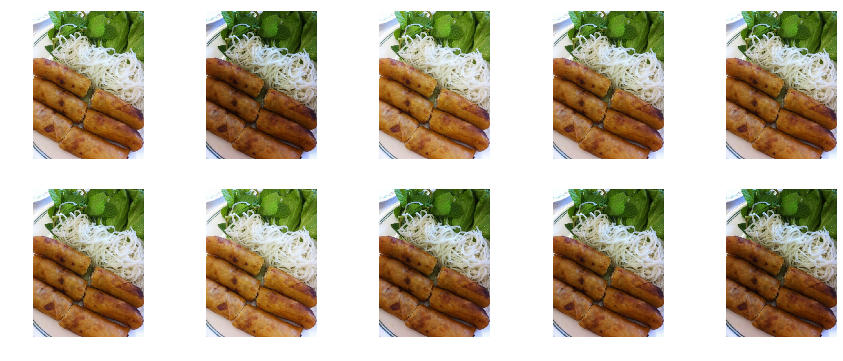

In [ ]:
plots_f_indiv(5, 2, 5, 15, 6)

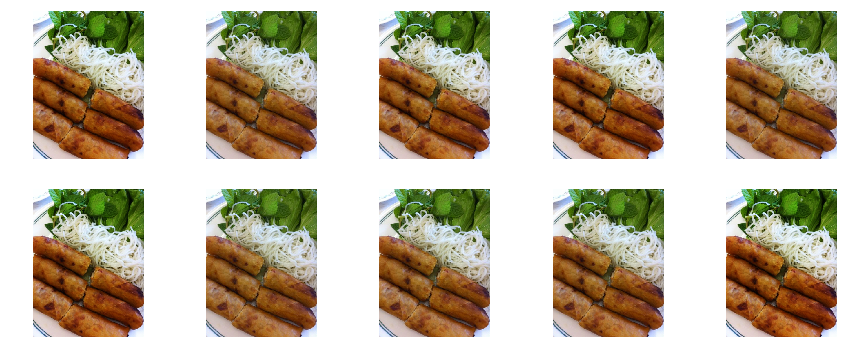

In [ ]:
plots_f_indiv(6, 2, 5, 15, 6)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.wd

0.01

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

For our loss function, we will use standard cross entropy.

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

We will also train in FP16

In [ ]:
learn = learn.to_fp16(dynamic=True);

To select our learning rate, we will use the learning rate finder utility in the fast.ai library. This sweeps through a wide range of possible learning rates, looking at how the loss evolves as a function of learning rate.

In [ ]:
from PIL import ImageFile        
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


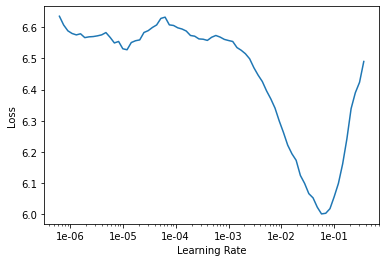

In [ ]:
learn.recorder.plot(skip_end=9)

In [ ]:
#Train linear head
learn.fit_one_cycle(4, max_lr=slice(1e-2))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.save('food_aug-1')

In [ ]:
#learn.load('food_aug-1');

In [ ]:
learn.unfreeze()

In [ ]:
#Train entire model with discriminative learning rates / one cycle policy 
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
learn.save('food_aug-2')

In [ ]:
learn.load('food_aug-2');

In [ ]:
interp.most_confused(min_val=4)

[('chocolate_cake', 'chocolate_mousse', 12),
 ('filet_mignon', 'steak', 9),
 ('dumplings', 'gyoza', 8),
 ('prime_rib', 'steak', 7),
 ('ice_cream', 'chocolate_mousse', 6),
 ('pulled_pork_sandwich', 'hamburger', 6),
 ('chocolate_mousse', 'chocolate_cake', 5),
 ('chocolate_mousse', 'tiramisu', 5),
 ('huevos_rancheros', 'breakfast_burrito', 5),
 ('sashimi', 'sushi', 5),
 ('shrimp_and_grits', 'risotto', 5),
 ('steak', 'filet_mignon', 5),
 ('steak', 'pork_chop', 5),
 ('sushi', 'sashimi', 5),
 ('beef_tartare', 'tuna_tartare', 4),
 ('chocolate_mousse', 'ice_cream', 4),
 ('gnocchi', 'ravioli', 4),
 ('gyoza', 'dumplings', 4),
 ('ice_cream', 'frozen_yogurt', 4),
 ('prime_rib', 'filet_mignon', 4),
 ('ravioli', 'gnocchi', 4),
 ('red_velvet_cake', 'cup_cakes', 4),
 ('scallops', 'foie_gras', 4),
 ('strawberry_shortcake', 'cheesecake', 4),
 ('tuna_tartare', 'beef_tartare', 4)]

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import manifold, datasets
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import squareform
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import NullFormatter
import PIL

In [ ]:
probs_trans = manifold.TSNE(n_components=2, perplexity=15).fit_transform(preds_tta)

In [ ]:
prob_df = pd.DataFrame(np.concatenate((probs_trans, y[:,None]), axis=1), columns=['x','y','labels'])

This is a cluster over all 25250 predictions, colored by true class. We see lots of well defined class clusters, as we would expect, as well as a few rogue examples falling into the wrong class cluster.

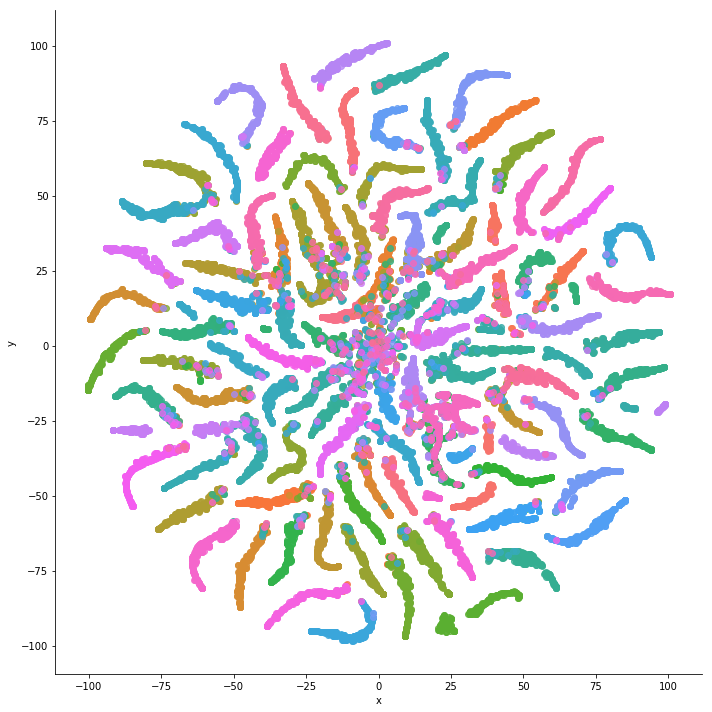

In [ ]:
g = sns.lmplot('x', 'y', data=prob_df, hue='labels', fit_reg=False, legend=False, height=10)